**Noise Reduction**

Denoising is removing the noise from an image rendering the important features more visible and also increases the efficiency of the further data processing tasks.

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/dog-smiling.png", cv2.IMREAD_COLOR)
image = cv2.resize(image,(200,200),interpolation=cv2.INTER_AREA)

**Gaussian Filter**

The Gaussian filter blurs the image as output is an average of the pixels value within the particular neighborhood with a weighting function of Gaussian distribution.

فیلتر گاوسی تصویر را محو (blur) می‌کند؛ چون خروجی آن برابر با میانگین مقادیر پیکسل‌ها در یک همسایگی مشخص است، با این تفاوت که این میانگین‌گیری بر اساس یک تابع وزن‌دهی به شکل توزیع گاوسی انجام می‌شود.

این روش باعث می‌شود بخش‌های پر از نویز با فرکانس بالا (مثل جزئیات ریز و لبه‌ها) کاهش یابند و تصویر نرم‌تر (smooth) به‌نظر برسد.



---

انحراف معیار (σ یا sigma) در تابع گاوسی میزان صاف شدن تصویر را کنترل می‌کند:

سیگمای کوچک: صاف‌سازی کمتر → جزئیات و ویژگی‌های تصویر بیشتر حفظ می‌شوند.

سیگمای بزرگ: صاف‌سازی بیشتر → جزئیات مهم هم ممکن است از بین بروند.

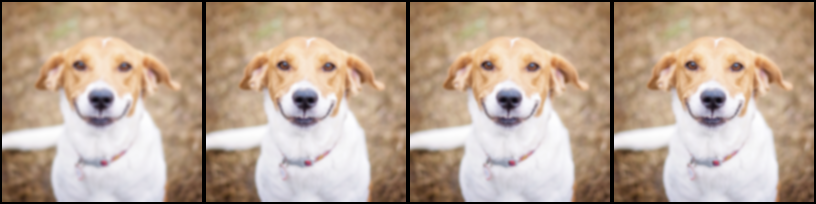

In [13]:
def gaussian_denoise(sigma,kernel):
  return cv2.GaussianBlur(image,(kernel,kernel),sigma)

border = 2
out1 = cv2.copyMakeBorder(gaussian_denoise(1.5,5), border, border, border, border, cv2.BORDER_CONSTANT, value=(0,0,0))
out2 = cv2.copyMakeBorder(gaussian_denoise(0,5), border, border, border, border, cv2.BORDER_CONSTANT, value=(0,0,0))
out3 = cv2.copyMakeBorder(gaussian_denoise(0,5), border, border, border, border, cv2.BORDER_CONSTANT, value=(0,0,0))
out4 = cv2.copyMakeBorder(gaussian_denoise(1,7), border, border, border, border, cv2.BORDER_CONSTANT, value=(0,0,0))


row = np.hstack((out1, out2, out3, out4))


cv2_imshow(row)



**Median filtering**

The Median filter is a non-linear filter that replaces each pixel value with median value of the pixels in its neighborhood.


---


It can effectively filter out any noise particularly the outliers WHILE at the same time making sure that overall important features will not be lost.

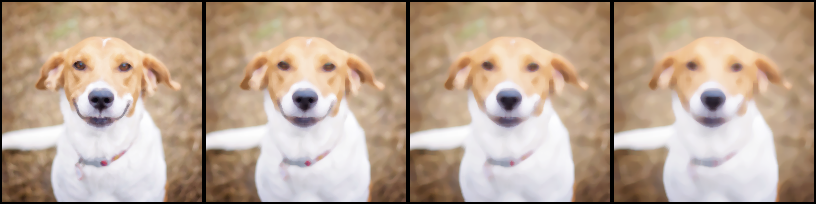

In [12]:
def median_blur(kernel):
  return cv2.medianBlur(image,kernel)


border = 2
out1 = cv2.copyMakeBorder(median_blur(3), border, border, border, border, cv2.BORDER_CONSTANT, value=(0,0,0))
out2 = cv2.copyMakeBorder(median_blur(5), border, border, border, border, cv2.BORDER_CONSTANT, value=(0,0,0))
out3 = cv2.copyMakeBorder(median_blur(7), border, border, border, border, cv2.BORDER_CONSTANT, value=(0,0,0))
out4 = cv2.copyMakeBorder(median_blur(9), border, border, border, border, cv2.BORDER_CONSTANT, value=(0,0,0))


row = np.hstack((out1, out2, out3, out4))


cv2_imshow(row)

**NLM**

NLM gives excellent results in preserving vital features such as textures and fine details because it is able to search for similar patterns within the image.

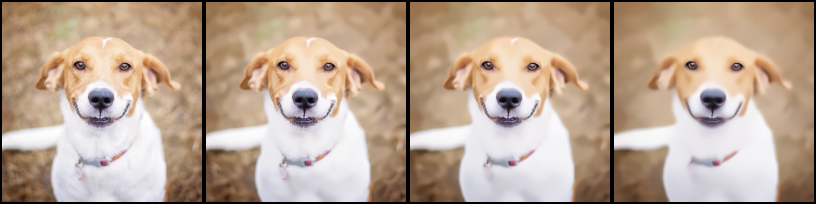

In [17]:
def nlm(h):
  return cv2.fastNlMeansDenoising(image, h=h, templateWindowSize=7, searchWindowSize=21)



border = 2
out1 = cv2.copyMakeBorder(image, border, border, border, border, cv2.BORDER_CONSTANT, value=(0,0,0))
out2 = cv2.copyMakeBorder(nlm(5), border, border, border, border, cv2.BORDER_CONSTANT, value=(0,0,0))
out3 = cv2.copyMakeBorder(nlm(10), border, border, border, border, cv2.BORDER_CONSTANT, value=(0,0,0))
out4 = cv2.copyMakeBorder(nlm(20), border, border, border, border, cv2.BORDER_CONSTANT, value=(0,0,0))

row = np.hstack((out1,out2,out3,out4))
cv2_imshow(row)

*The last one made me say "WoW"*